In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel("online_retail_II.xlsx", sheet_name= 'Year 2009-2010')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df['Customer ID'].unique

<bound method Series.unique of 0         13085.0
1         13085.0
2         13085.0
3         13085.0
4         13085.0
           ...   
525456    17530.0
525457    17530.0
525458    17530.0
525459    17530.0
525460    17530.0
Name: Customer ID, Length: 525461, dtype: float64>

In [7]:
# As Description is not much usefull for customer lifetime values prediction so we can drop this column
df = df.drop(columns=['Description'])

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
#  As we have 5 lakh+ rows in our data so dropping 1 lakh rows having null Customer id will not affect pur model accuracy. 
# As 80% of our data has valid customers
df = df[df['Customer ID'].notnull()]

In [10]:
df.shape

(417534, 7)

In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# Remove canceled transactions (InvoiceNo starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [13]:
df.shape

(407695, 7)

In [14]:
# Remove rows with non-positive quantities
df = df[df['Quantity'] > 0]

In [15]:
# Remove rows with non-positive unit prices
df = df[df['Price'] > 0]

In [16]:
df.shape

(407664, 7)

In [17]:
df['Total Price']=df['Quantity']*df['Price']

In [18]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [19]:
df['Invoice Day']=df['InvoiceDate'].dt.date

In [20]:
df['Hour']=df['InvoiceDate'].dt.hour

In [21]:
df

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,Invoice Day,Hour
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,7
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,7
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,7
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01,7
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,7
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,2010-12-09,20
525457,538171,22750,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12-09,20
525458,538171,22751,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,2010-12-09,20
525459,538171,20970,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,2010-12-09,20


## EDA

In [22]:
top_countries = df.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(10)

In [23]:
print(top_countries)

Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Total Price, dtype: float64


C:\Users\Saksham Kaushik\AppData\Local\Temp\ipykernel_21360\142158016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="plasma")


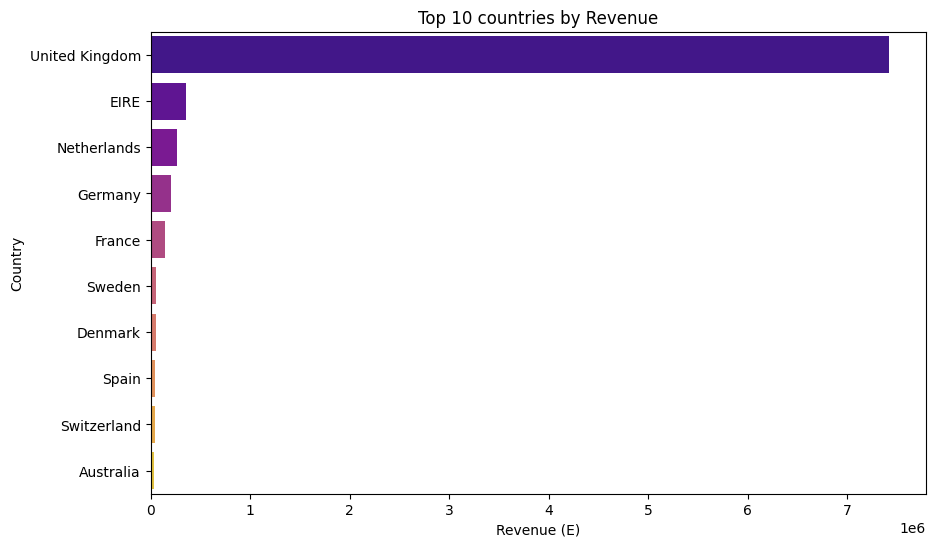

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="plasma")
plt.title("Top 10 countries by Revenue")
plt.xlabel("Revenue (E)")
plt.ylabel("Country")
plt.show()

C:\Users\Saksham Kaushik\AppData\Local\Temp\ipykernel_21360\1051186551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index,palette="viridis")


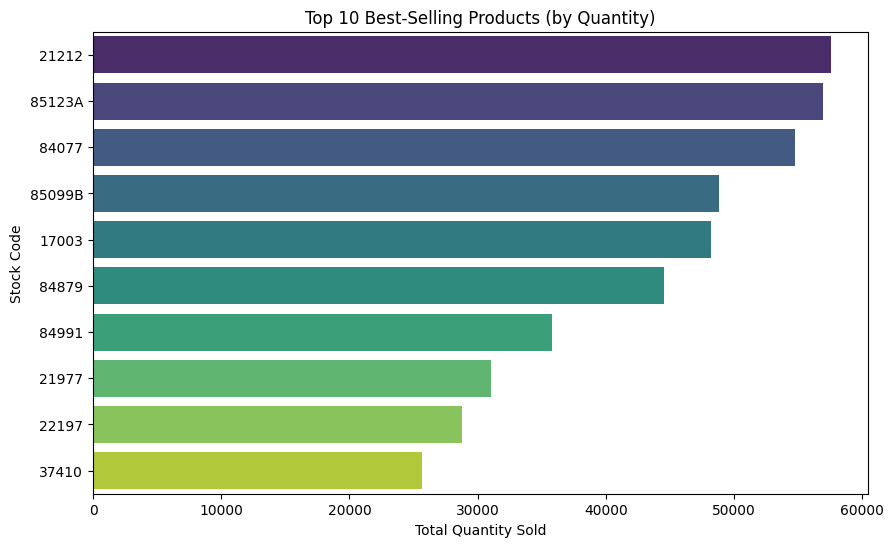

In [25]:
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index,palette="viridis")
plt.title("Top 10 Best-Selling Products (by Quantity)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Stock Code")
plt.show()

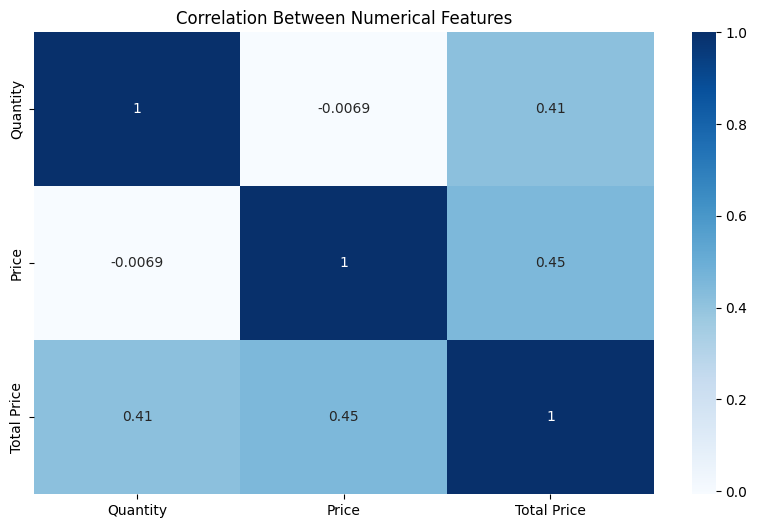

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Quantity', 'Price', 'Total Price']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Numerical Features")
plt.show()

C:\Users\Saksham Kaushik\AppData\Local\Temp\ipykernel_21360\1113719043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df,palette="inferno")


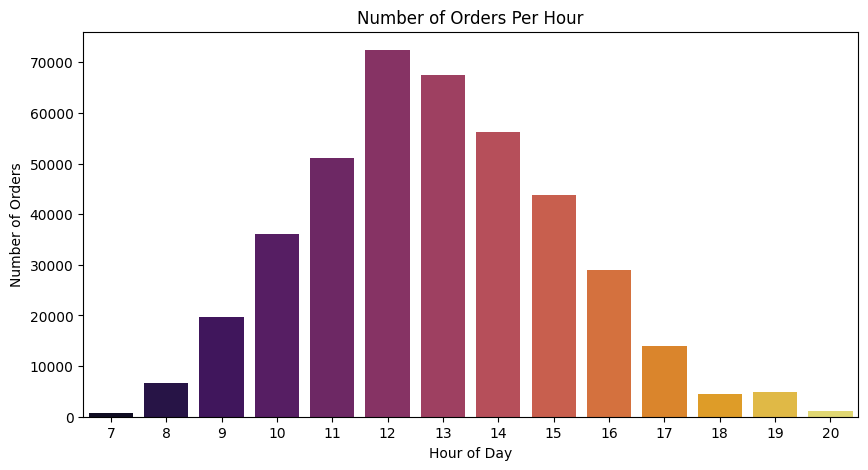

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df,palette="inferno")
plt.title("Number of Orders Per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

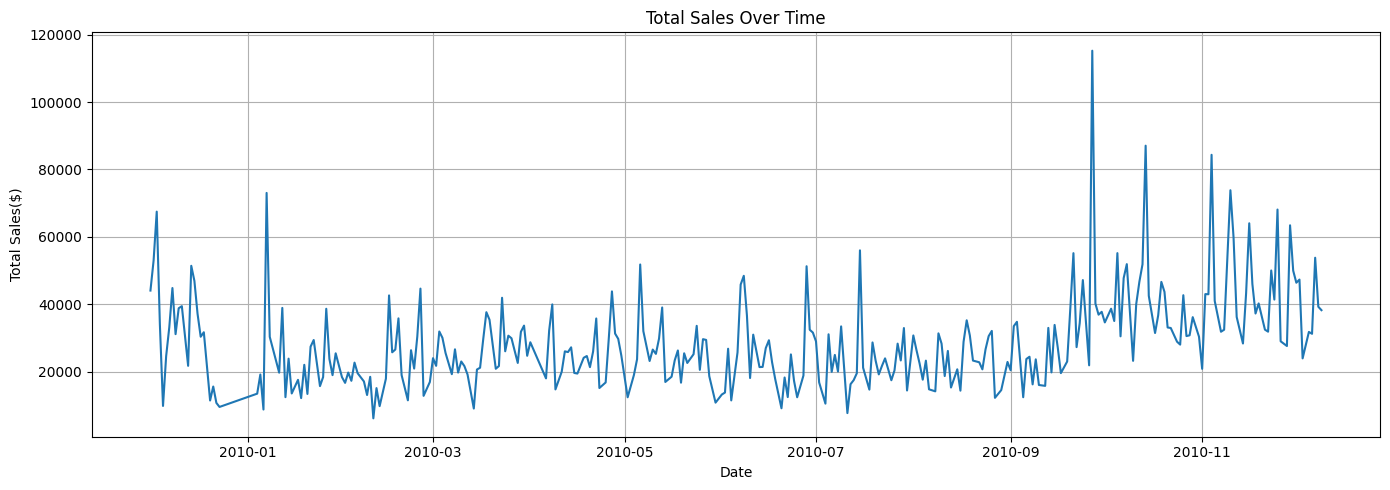

In [28]:
daily_sales = df.groupby('Invoice Day')['Total Price'].sum()
plt.figure(figsize=(14,5))
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df["Hour"].unique()

array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8, 20],
      dtype=int32)

In [30]:
hours = [0, 5, 12, 17, 21, 24] 
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']  
df['Session'] = pd.cut(df['Hour'], bins=hours, labels=labels, right=False, include_lowest=True,ordered=False)


In [31]:
df['Session'].unique()

['Morning', 'Afternoon', 'Evening']
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407664 entries, 0 to 525460
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Quantity     407664 non-null  int64         
 3   InvoiceDate  407664 non-null  datetime64[ns]
 4   Price        407664 non-null  float64       
 5   Customer ID  407664 non-null  float64       
 6   Country      407664 non-null  object        
 7   Total Price  407664 non-null  float64       
 8   Invoice Day  407664 non-null  object        
 9   Hour         407664 non-null  int32         
 10  Session      407664 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int32(1), int64(1), object(4)
memory usage: 33.0+ MB


In [33]:
import datetime

# Define a reference date (1 day after the last purchase in the dataset)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Create RFM table
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'Total Price': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [34]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,165,11,372.86
1,12347.0,3,2,1323.32
2,12348.0,74,1,222.16
3,12349.0,43,3,2671.14
4,12351.0,11,1,300.93
...,...,...,...,...
4307,18283.0,18,6,641.77
4308,18284.0,67,1,461.68
4309,18285.0,296,1,427.00
4310,18286.0,112,2,1296.43


# Without Scaling

In [35]:
X = rfm[['Recency', 'Frequency']]
y = rfm['Monetary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE :", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression MSE : 22802016.316475384
Linear Regression R² Score: 0.18182200883803956


In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression MSE :", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression MSE : 22801808.109966975
Ridge Regression R² Score: 0.1818294796678307


In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print("Random Forest Regressor MSE:", mean_squared_error(y_test, y_pred))
print("Random Forest Regressor R² Score:", r2_score(y_test, y_pred))

Random Forest Regressor MSE: 27536276.08514521
Random Forest Regressor R² Score: 0.011948121660332767


In [39]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost MSE: 28371709.833536617
XGBoost R² Score: -0.018028767072700402


# With Scaling

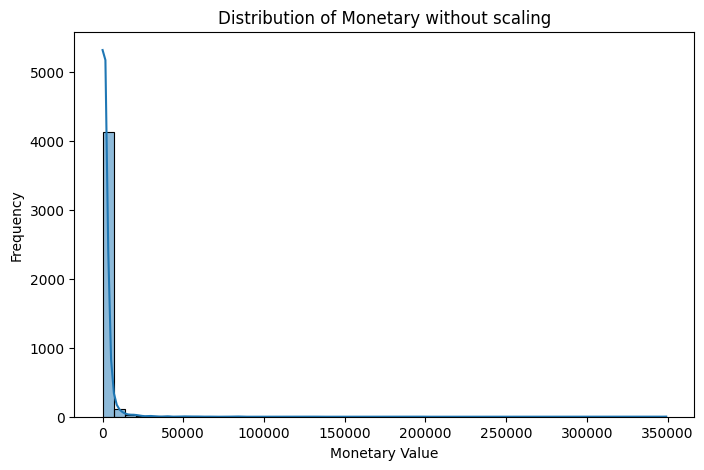

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title("Distribution of Monetary without scaling")
plt.xlabel("Monetary Value")
plt.ylabel("Frequency")
plt.show()

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency']])
features = pd.DataFrame(X_scaled, columns=['Recency', 'Frequency'])
# Apply log1p (log(1 + x)) to reduce skew
target = np.log1p(rfm['Monetary'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

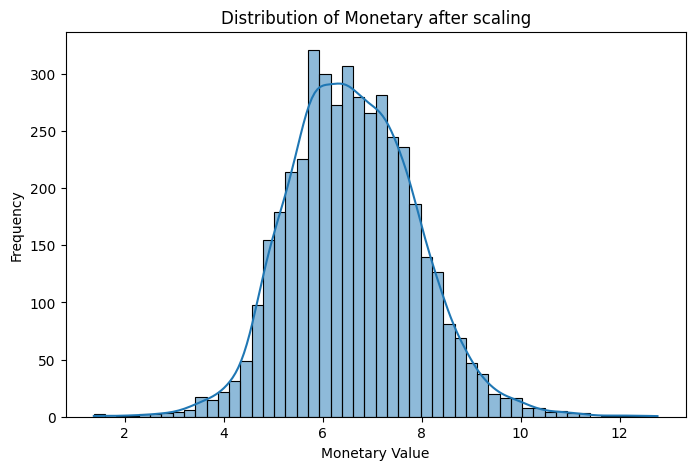

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=50, kde=True)
plt.title("Distribution of Monetary after scaling")
plt.xlabel("Monetary Value")
plt.ylabel("Frequency")
plt.show()

In [43]:
# list to store MSE and R2 score
results= []

In [44]:
lr.fit(X_train, y_train)
y_pred_log_lr = lr.predict(X_test)

print("Linear Regression MSE :", mean_squared_error(y_test, y_pred_log_lr))
print("Linear Regression R² Score:", r2_score(y_test, y_pred_log_lr))

results.append(
    {
        "Model":"Linear Regression",
        "MSE" : mean_squared_error(y_test, y_pred_log_lr),
        "R2 score" : r2_score(y_test, y_pred_log_lr) 
    }
)

Linear Regression MSE : 0.9145557006967323
Linear Regression R² Score: 0.45516887011459184


In [45]:
ridge.fit(X_train, y_train)
y_pred_log_ridge = ridge.predict(X_test)

print("Ridge Regression MSE :", mean_squared_error(y_test, y_pred_log_ridge))
print("Ridge Regression R² Score:", r2_score(y_test, y_pred_log_ridge))

results.append(
    {
        "Model":"Ridge Regression",
        "MSE" : mean_squared_error(y_test, y_pred_log_ridge),
        "R2 score" : r2_score(y_test, y_pred_log_ridge) 
    }
)

Ridge Regression MSE : 0.914559188460729
Ridge Regression R² Score: 0.45516679233803026


In [46]:
rfr.fit(X_train, y_train)
y_pred_log_rfr = rfr.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_log_rfr))
print("Random Forest R² Score:", r2_score(y_test, y_pred_log_rfr))

results.append(
    {
        "Model":"Random Forest Regression",
        "MSE" : mean_squared_error(y_test, y_pred_log_rfr),
        "R2 score" : r2_score(y_test, y_pred_log_rfr) 
    }
)

Random Forest MSE: 0.6101564574168692
Random Forest R² Score: 0.6365095840001267


In [47]:
xgb.fit(X_train, y_train)

y_pred_log_xgb = xgb.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_log_xgb))
print("XGBoost R² Score:", r2_score(y_test, y_pred_log_xgb))

results.append(
    {
        "Model":" XG Boost Regression",
        "MSE" : mean_squared_error(y_test, y_pred_log_xgb),
        "R2 score" : r2_score(y_test, y_pred_log_xgb) 
    }
)

XGBoost MSE: 0.4818183778550858
XGBoost R² Score: 0.7129648298005751


In [48]:
results_df=pd.DataFrame(results)
print(results_df)

                      Model       MSE  R2 score
0         Linear Regression  0.914556  0.455169
1          Ridge Regression  0.914559  0.455167
2  Random Forest Regression  0.610156  0.636510
3       XG Boost Regression  0.481818  0.712965


In [49]:
rfm_scaled = features
rfm_scaled['Monetary'] = target

In [50]:
rfm_scaled

,Recency,Frequency,Monetary
0,0.762299,0.801087,5.923881
1,-0.910402,-0.300603,7.188654
2,-0.177305,-0.423013,5.407889
3,-0.497389,-0.178193,7.890635
4,-0.827799,-0.423013,5.710195
...,...,...,...
4307,-0.755522,0.189037,6.465787
4308,-0.249582,-0.423013,6.137036
4309,2.114914,-0.423013,6.059123
4310,0.215057,-0.300603,7.168141


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

In [52]:
rfm['Segment']

0       1
1       0
2       3
3       0
4       3
       ..
4307    3
4308    3
4309    1
4310    0
4311    0
Name: Segment, Length: 4312, dtype: int32

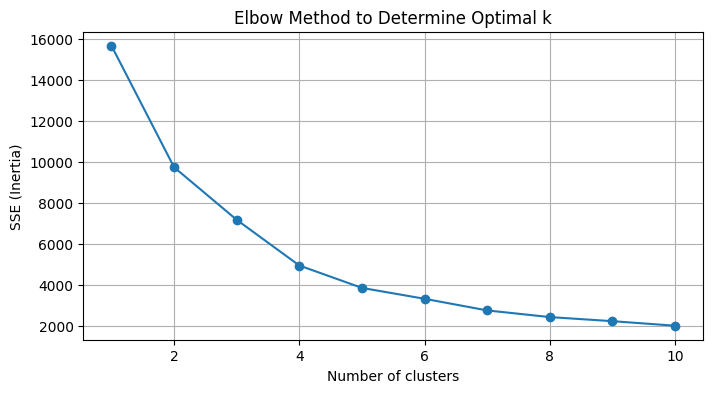

In [53]:
from sklearn.cluster import KMeans

sse = []
K_range= range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

In [54]:
from kneed import KneeLocator

kneedle = KneeLocator(K_range, sse, curve="convex", direction="decreasing")
print("Best K:", kneedle.elbow)

Best K: 4


In [55]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [56]:
# View average RFM values per cluster
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

,Recency,Frequency,Monetary
Cluster,,,
0,40.4,7.5,3610.6
1,250.4,1.5,373.4
2,10.5,69.9,55491.4
3,53.0,2.1,496.5


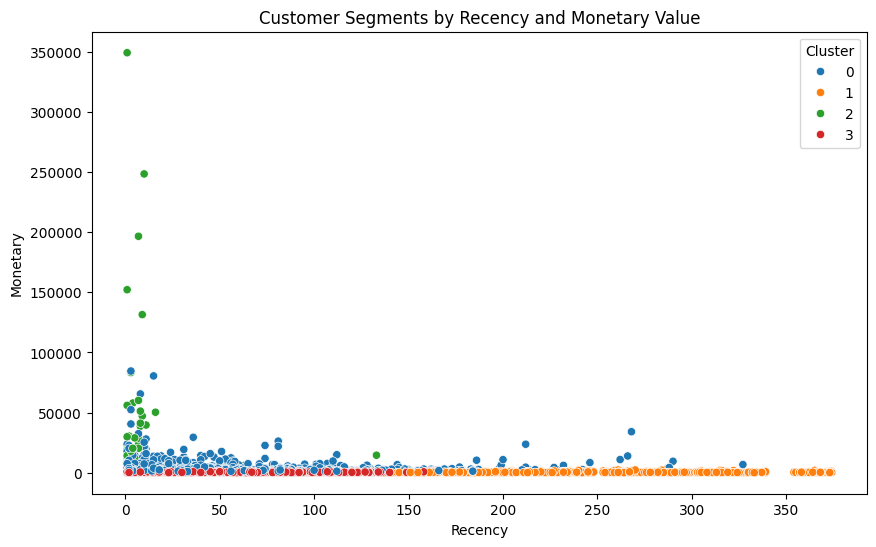

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Customer Segments by Recency and Monetary Value')
plt.show()

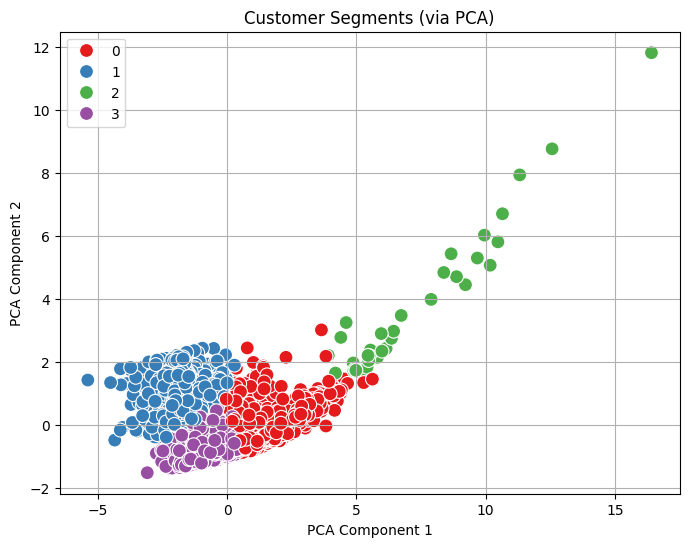

In [58]:
pca = PCA(2)
pca_components = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=rfm['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
rfm['Label'] = rfm['Cluster'].map({
    0: 'Regulars',
    1: 'Churned',
    2: 'Champions',
    3: 'Loyal Customers'
})

**Champions / VIPs (Cluster 2):**
These are your best customers. They buy very often, spend a lot of money, and have shopped very recently.

**Loyal Customers (Cluster 3):** 
These customers shop regularly, spend a good amount, and have made recent purchases. They are important for steady business.

**Regular Customers (Cluster 0):** 
These customers shop sometimes, not too often or recently, and don’t spend much. They may need more attention to become loyal.

**At Risk / Churned (Cluster 1):**
These customers haven’t shopped in a long time, don’t buy much, and don’t spend much either. They might be leaving your business and     need to be re-engaged.

In [60]:
rfm

,CustomerID,Recency,Frequency,Monetary,Segment,Cluster,Label
0,12346.0,165,11,372.86,1,1,Churned
1,12347.0,3,2,1323.32,0,0,Regulars
2,12348.0,74,1,222.16,3,3,Loyal Customers
3,12349.0,43,3,2671.14,0,0,Regulars
4,12351.0,11,1,300.93,3,3,Loyal Customers
...,...,...,...,...,...,...,...
4307,18283.0,18,6,641.77,3,3,Loyal Customers
4308,18284.0,67,1,461.68,3,3,Loyal Customers
4309,18285.0,296,1,427.00,1,1,Churned
4310,18286.0,112,2,1296.43,0,0,Regulars
